In [2]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os


import graphviz
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

In [3]:
%load_ext blackcellmagic

In [4]:
# directory_19 = r'F:\Ecobee\files\2019_sac'
# for filename in os.listdir(directory_19):
#     if filename.endswith(".zip"):
#         print(os.path.join(directory_19, filename))
#     else:
#         continue

In [5]:
# users_sac_2019_name_list_csv=[w[:-4] for w in os.listdir(directory_19)]

# users_sac_2019_name_list_csv

In [6]:
from zipfile import ZipFile
directory_18 = r'F:\Ecobee\files\2018_sac'
df_sac_18_daily_midpeak = pd.DataFrame()
hours_to_keep = [12, 13, 14, 15, 16, 20, 21, 22, 23]
import datetime
for filename in os.listdir(directory_18):
    myzip = ZipFile(os.path.join(directory_18, filename))
    g = myzip.open(filename[:-4])
    df_temp = pd.read_csv(g, parse_dates=['DateTime'])
    df_temp1 = pd.get_dummies(df_temp, columns=['HvacMode'])
    df_temp1['Date'] = df_temp1['DateTime'].dt.date
    df_temp1['user_id'] = filename[:-8]
    df_temp1 = df_temp1[(df_temp1['DateTime'].dt.hour.isin(hours_to_keep)) &
                        (df_temp1['DateTime'].dt.month >= 6) &
                        (df_temp1['DateTime'].dt.month <=
                         9)]  #summer days only
    df_day = df_temp1.groupby([df_temp1['Date']]).agg(
        daily_total_heating=pd.NamedAgg(column='auxHeat1', aggfunc=sum),
        daily_total_cooling=pd.NamedAgg(column='compCool1', aggfunc=sum),
        user_id=pd.NamedAgg(column='user_id', aggfunc=min)).reset_index()
    df_day['daily_total_heating'] = df_day['daily_total_heating'] / 3600
    df_day['daily_total_cooling'] = df_day['daily_total_cooling'] / 3600
    df_sac_18_daily_midpeak = pd.concat([df_sac_18_daily_midpeak, df_day])
    g.close()
    myzip.close()

In [7]:
df_sac_18_daily_midpeak.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21249 entries, 0 to 121
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 21249 non-null  object 
 1   daily_total_heating  21249 non-null  float64
 2   daily_total_cooling  21249 non-null  float64
 3   user_id              21249 non-null  object 
dtypes: float64(2), object(2)
memory usage: 830.0+ KB


In [8]:
pd.set_option('display.max_rows', None)
#remove user_ids that have no cooling consumption at all for 2018
df_18_temp=df_sac_18_daily_midpeak[['user_id', 'daily_total_cooling']].groupby('user_id').max().reset_index()
df_18_temp['any_usage']=(df_18_temp.daily_total_cooling>0)
df_18_temp=df_18_temp['user_id'][df_18_temp['any_usage']==True]
df_sac_18_daily_midpeak=pd.merge(df_18_temp,df_sac_18_daily_midpeak,how='left', on='user_id')


In [9]:
df_sac_18_daily_midpeak.head()

,user_id,Date,daily_total_heating,daily_total_cooling
0,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-01,0.0,0.975000
1,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-02,0.0,1.983333
2,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-03,0.0,3.512500
3,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-04,0.0,1.895833
4,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-05,0.0,1.179167


In [10]:
from zipfile import ZipFile
directory_19 = r'F:\Ecobee\files\2019_sac'
df_sac_19_daily_midpeak = pd.DataFrame()
hours_to_keep = [12, 13, 14, 15, 16, 20, 21, 22, 23]
import datetime
for filename in os.listdir(directory_19):
    myzip = ZipFile(os.path.join(directory_19, filename))
    f = myzip.open(filename[:-4])
    df_temp = pd.read_csv(f, parse_dates=['DateTime'])
    df_temp1 = pd.get_dummies(df_temp, columns=['HvacMode'])
    df_temp1['Date'] = df_temp1['DateTime'].dt.date
    df_temp1['user_id'] = filename[:-8]
    df_temp1 = df_temp1[(df_temp1['DateTime'].dt.hour.isin(hours_to_keep)) &
                        (df_temp1['DateTime'].dt.month >= 6) &
                        (df_temp1['DateTime'].dt.month <=
                         9)]  #summer days only
    df_day = df_temp1.groupby([df_temp1['Date']]).agg(
        daily_total_heating=pd.NamedAgg(column='auxHeat1', aggfunc=sum),
        daily_total_cooling=pd.NamedAgg(column='compCool1', aggfunc=sum),
        user_id=pd.NamedAgg(column='user_id', aggfunc=min)).reset_index()
    df_day['daily_total_heating'] = df_day['daily_total_heating'] / 3600
    df_day['daily_total_cooling'] = df_day['daily_total_cooling'] / 3600
    df_sac_19_daily_midpeak = pd.concat([df_sac_19_daily_midpeak, df_day])
    f.close()
    myzip.close()

In [11]:
df_sac_19_daily_midpeak.head()
#note there is a "time jump" from 2019-07-25 16:55 to 2019-07-26 17:00

,Date,daily_total_heating,daily_total_cooling,user_id
0,2019-06-01,0.0,2.045833,0038e4cc0089e5a289601a79af4b6c6f2c9efc97
1,2019-06-02,0.0,1.479167,0038e4cc0089e5a289601a79af4b6c6f2c9efc97
2,2019-06-03,0.0,0.316667,0038e4cc0089e5a289601a79af4b6c6f2c9efc97
3,2019-06-04,0.0,3.216667,0038e4cc0089e5a289601a79af4b6c6f2c9efc97
4,2019-06-05,0.0,1.254167,0038e4cc0089e5a289601a79af4b6c6f2c9efc97


In [12]:
# pd.set_option('display.max_rows', None)
# #remove user_ids that have no cooling consumption at all for 2019
# df_19_temp=df_sac_19_daily_midpeak[['user_id', 'daily_total_cooling']].groupby('user_id').max().reset_index()
# df_19_temp['any_usage']=(df_19_temp.daily_total_cooling>0)
# df_19_temp=df_19_temp['user_id'][df_19_temp['any_usage']==True]
# df_sac_19_daily_midpeak=pd.merge(df_19_temp,df_sac_19_daily_midpeak,how='left', on='user_id')

In [13]:
df_sac_19_daily_midpeak.head()

,Date,daily_total_heating,daily_total_cooling,user_id
0,2019-06-01,0.0,2.045833,0038e4cc0089e5a289601a79af4b6c6f2c9efc97
1,2019-06-02,0.0,1.479167,0038e4cc0089e5a289601a79af4b6c6f2c9efc97
2,2019-06-03,0.0,0.316667,0038e4cc0089e5a289601a79af4b6c6f2c9efc97
3,2019-06-04,0.0,3.216667,0038e4cc0089e5a289601a79af4b6c6f2c9efc97
4,2019-06-05,0.0,1.254167,0038e4cc0089e5a289601a79af4b6c6f2c9efc97


In [14]:
df_sac_18n19_daily_midpeak=pd.concat([df_sac_18_daily_midpeak,df_sac_19_daily_midpeak])
df_sac_18n19_daily_midpeak.head()

,user_id,Date,daily_total_heating,daily_total_cooling
0,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-01,0.0,0.975000
1,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-02,0.0,1.983333
2,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-03,0.0,3.512500
3,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-04,0.0,1.895833
4,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-05,0.0,1.179167


In [15]:
df_sac_18n19_daily_midpeak['count'] = df_sac_18n19_daily_midpeak.groupby('user_id')['user_id'].transform('count')
df_sac_18n19_daily_midpeak['count'].value_counts()

244    30744
122    16836
121     3509
243     1944
241      964
224      896
238      476
232      464
226      452
220      440
120      360
118      354
117      351
170      340
98       294
240      240
237      237
236      236
234      234
233      233
231      231
230      230
229      229
228      228
223      223
221      221
219      219
214      214
207      207
196      196
195      195
188      188
176      176
83       166
164      164
153      153
144      144
135      135
127      127
125      125
113      113
112      112
111      111
109      109
108      108
105      105
102      102
97        97
95        95
89        89
87        87
86        86
84        84
73        73
65        65
48        48
46        46
37        37
12        12
3          3
Name: count, dtype: int64

In [16]:
df_sac_18n19_daily_midpeak.head()

,user_id,Date,daily_total_heating,daily_total_cooling,count
0,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-01,0.0,0.975000,244
1,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-02,0.0,1.983333,244
2,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-03,0.0,3.512500,244
3,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-04,0.0,1.895833,244
4,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-05,0.0,1.179167,244


In [17]:
df_sac_18n19_daily_midpeak=df_sac_18n19_daily_midpeak[df_sac_18n19_daily_midpeak['count']>=241]
df_sac_18n19_daily_midpeak['Date']=pd.to_datetime(df_sac_18n19_daily_midpeak['Date'])
df_sac_18n19_daily_midpeak.head()

,user_id,Date,daily_total_heating,daily_total_cooling,count
0,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-01,0.0,0.975000,244
1,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-02,0.0,1.983333,244
2,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-03,0.0,3.512500,244
3,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-04,0.0,1.895833,244
4,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-05,0.0,1.179167,244


In [18]:
df_temperature=pd.read_csv(r'F:\Ecobee\smf_temp_18and19.csv', parse_dates=['DATE'])
df_temperature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   STATION  730 non-null    object        
 1   NAME     730 non-null    object        
 2   DATE     730 non-null    datetime64[ns]
 3   TAVG     730 non-null    int64         
 4   TMAX     730 non-null    int64         
 5   TMIN     730 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 34.3+ KB


In [19]:
df_temperature.head()

,STATION,NAME,DATE,TAVG,TMAX,TMIN
0,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-01-01,49,65,38
1,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-01-02,48,59,39
2,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-01-03,50,57,40
3,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-01-04,55,65,49
4,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-01-05,55,60,50


In [20]:
df_sac_18n19_daily_midpeak_w_temperature=pd.merge(df_sac_18n19_daily_midpeak,df_temperature,how='left', left_on='Date', right_on='DATE')
df_sac_18n19_daily_midpeak_w_temperature.head()

,user_id,Date,daily_total_heating,daily_total_cooling,count,STATION,NAME,DATE,TAVG,TMAX,TMIN
0,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-01,0.0,0.975000,244,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-06-01,65,86,49
1,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-02,0.0,1.983333,244,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-06-02,74,96,55
2,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-03,0.0,3.512500,244,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-06-03,78,98,58
3,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-04,0.0,1.895833,244,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-06-04,76,89,58
4,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-05,0.0,1.179167,244,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-06-05,67,84,53


In [21]:
# generate a new column indicating on/off of cooling AC
df_sac_18n19_daily_midpeak_w_temperature["AC_cooling_on"] = np.where(
    df_sac_18n19_daily_midpeak_w_temperature["daily_total_cooling"] > 0, 1, 0
)

In [22]:
df_sac_18n19_daily_midpeak_w_temperature[
    'TAVG_less_62'] = df_sac_18n19_daily_midpeak_w_temperature['TAVG'] - 62
df_sac_18n19_daily_midpeak_w_temperature['TAVG_less_62'] = df_sac_18n19_daily_midpeak_w_temperature['TAVG_less_62'].apply(lambda x : x if x > 0 else 0)

In [23]:
df_sac_18n19_daily_midpeak_w_temperature['y2019']=np.where(df_sac_18n19_daily_midpeak_w_temperature['Date'].dt.year== 2019, 1, 0)
# [df_sac_18n19_daily_midpeak_w_temperature['Date'].dt.year==2019]
df_sac_18n19_daily_midpeak_w_temperature.describe()

,daily_total_heating,daily_total_cooling,count,TAVG,TMAX,TMIN,AC_cooling_on,TAVG_less_62,y2019
count,33652.000000,33652.000000,33652.000000,33652.000000,33652.000000,33652.000000,33652.000000,33652.000000,33652.000000
mean,0.000112,1.839128,243.856294,72.740521,90.383840,58.507607,0.761351,10.777428,0.499911
std,0.006961,1.870274,0.543084,5.188641,7.226468,4.006662,0.426264,5.098282,0.500007
min,0.000000,0.000000,241.000000,58.000000,69.000000,45.000000,0.000000,0.000000,0.000000
25%,0.000000,0.112500,244.000000,69.000000,86.000000,56.000000,1.000000,7.000000,0.000000
50%,0.000000,1.404167,244.000000,73.000000,91.000000,58.000000,1.000000,11.000000,0.000000
75%,0.000000,2.912500,244.000000,76.000000,96.000000,61.000000,1.000000,14.000000,1.000000
max,0.779167,9.000000,244.000000,86.000000,105.000000,69.000000,1.000000,24.000000,1.000000


In [24]:
df_sac_18n19_daily_midpeak_w_temperature[
    'interaction'] = df_sac_18n19_daily_midpeak_w_temperature[
        'TAVG_less_62'] * df_sac_18n19_daily_midpeak_w_temperature['y2019']

In [25]:
import statsmodels.api as sm


def regress(data, yvar, xvars):
    Y = data[yvar]
    X = data[xvars]
    X['intercept'] = 1.
    result = sm.OLS(Y, X).fit(cov_type='HC1')
    return result.params


#This is what you need
results=df_sac_18n19_daily_midpeak_w_temperature.groupby('user_id').apply(
    regress, 'AC_cooling_on', ['TAVG_less_62','interaction']).reset_index()
results.head(10)

,user_id,TAVG_less_62,interaction,intercept
0,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,0.014518,-0.003760,0.820220
1,00e2f68ec737f7480114a67bbef7c5f65b6b8516,0.054869,-0.008206,0.177448
2,01479a9a84e1722791f2b440f6d4f14f51025499,0.013905,0.000619,0.789162
3,0150a428f7cc891b6a69cb7db390869c96a24f1d,0.025549,0.004883,0.556971
4,02dc9385bcf16019883895622d8af493de236faa,0.018488,-0.001877,0.736101
5,0614c5d47de23d61b21be2141907668a54bf45a0,0.017915,0.001736,0.727172
6,06d89337caa78e3ed6e3591c9e22b8808a82c327,0.066910,0.000573,-0.097470
7,0773f65bc76833bddd55f0f850ded5d14bc8ab99,0.021240,-0.001168,0.695867
8,084a2b8c0522a36209d062d852d04bb64494ea84,0.039755,0.000488,0.351452
9,08a71736460f4b41fb6a69bd7d9194b907965809,0.012262,-0.009146,0.841578


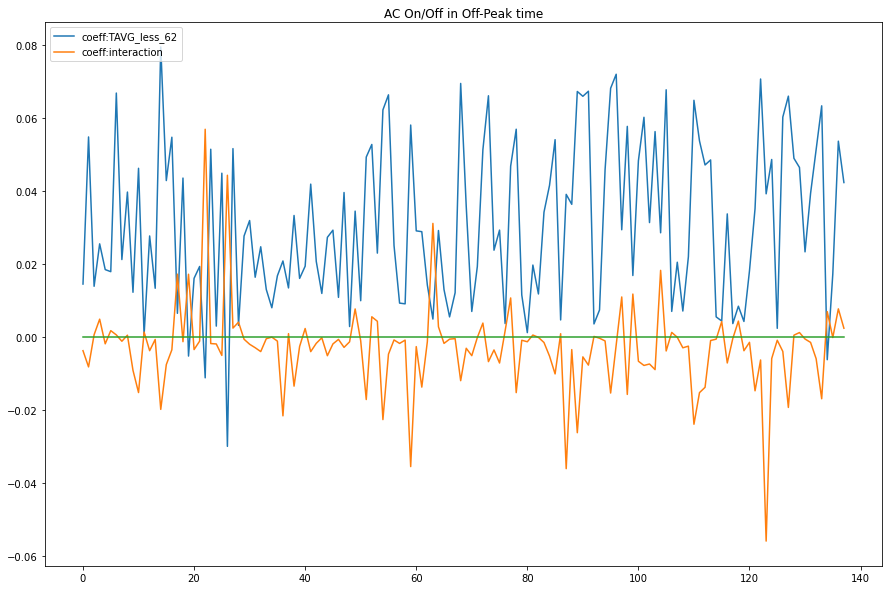

In [26]:
# x axis range
x = range(len(results))
plt.figure(figsize=(15,10))
# y2
plt.plot(x,results['TAVG_less_62'],label='coeff:TAVG_less_62')
# y2
plt.plot(x,results['interaction'],label='coeff:interaction')
# y=0 line 
plt.plot(x,[0] * len(results))
plt.legend(loc="upper left")
plt.title('AC On/Off in Off-Peak time')
plt.show()

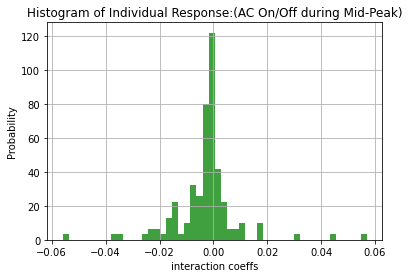

In [27]:
plt.hist(results['interaction'], 50, density=True, facecolor='g', alpha=0.75)
plt.xlabel('interaction coeffs')
plt.ylabel('Probability')
plt.title('Histogram of Individual Response:(AC On/Off during Mid-Peak)')
plt.grid(True)
plt.show()

In [28]:
print(results[results.interaction > 0.01].count())
print(results[results.interaction < -0.01].count())

user_id         9
TAVG_less_62    9
interaction     9
intercept       9
dtype: int64
user_id         22
TAVG_less_62    22
interaction     22
intercept       22
dtype: int64


In [29]:
print(results['interaction'][results.interaction > 0.01].sum())
print(results['interaction'][results.interaction < -0.01].sum())
# the sum of negative interaction coefficients has a larger scale

0.21866827759327406
-0.45026882760700915


In [30]:
df_sac_18n19_daily_midpeak_w_temperature['const']=1
reg1 = sm.OLS(endog=df_sac_18n19_daily_midpeak_w_temperature['AC_cooling_on'], \
              exog=df_sac_18n19_daily_midpeak_w_temperature[['TAVG_less_62','interaction','const']], \
    missing='drop')
reg_result = reg1.fit(cov_type='HC1')
print('*'*34+'On/Off: Peak'+'*'*34)
print(reg_result.summary())


**********************************On/Off: Peak**********************************
                            OLS Regression Results                            
Dep. Variable:          AC_cooling_on   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     2244.
Date:                Wed, 21 Apr 2021   Prob (F-statistic):               0.00
Time:                        12:41:20   Log-Likelihood:                -16931.
No. Observations:               33652   AIC:                         3.387e+04
Df Residuals:                   33649   BIC:                         3.389e+04
Df Model:                           2                                         
Covariance Type:                  HC1                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------

In [31]:
df_sac_18n19_daily_midpeak.user_id.nunique()

138